In [33]:
import time
from copy import copy
from statistics import mean
from collections import defaultdict
import os
from algorithms.algorithms import BeesAlgo, CSOAlgo, GeneticAlgo
from benchmark.evaluate import Evaluate
from loader import load_graph, load_constraints, load_metro_params, load_generator_data
from generator.generator import ClustersGridGenerator
import tqdm

import matplotlib.pyplot as plt

In [22]:
cg = ClustersGridGenerator(path=os.path.abspath("benchmark/test"))
flist = cg.generate_batch("tmp", [30, 35, 40, 45, 50, 55, 60, 65, 70, 75], [{'s': 300, 'p': 0.9}, {'s': 300, 'p': 0.9}])
print(flist)

['/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_30.json', '/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_35.json', '/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_40.json', '/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_45.json', '/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_50.json', '/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_55.json', '/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_60.json', '/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_65.json', '/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_70.json', '/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_75.json', '/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchma

<Figure size 640x480 with 0 Axes>

In [27]:
def calc(dset, algo_cls, algo_params, iters):
    print(f"Handling dataset: {dset}")
    dataset = dset
    G = load_graph(dataset)
    metro_params = load_metro_params(dataset)
    max_cost = load_constraints(dataset)
    min_w, max_w = load_generator_data(dataset)
    worker = Evaluate(G, metro_params, max_cost)

    vis_path = dset.split('.')[0]
    try:
        os.mkdir(vis_path)
    except FileExistsError:
        pass

    vis_path += '/vis/'
    try:
        os.mkdir(vis_path)
    except FileExistsError:
        pass

    sol_path = dset.split('.')[0]
    try:
        os.mkdir(sol_path)
    except FileExistsError:
        pass

    sol_path += '/sol/'
    try:
        os.mkdir(sol_path)
    except FileExistsError:
        pass

    gif_path = dset.split('.')[0] + '/solution.gif'
    algo_params.update({'min_w': min_w, 'max_w': max_w})
    
    algo = algo_cls(G, metro_params, algo_params, max_cost=max_cost, vis_path=vis_path, sol_path=sol_path, gif_path=gif_path)
    start = time.time()
    algo.run(iterations=iters, visualize=True, save_best=True, generate_gif=True, verbose=0)
    end = time.time()
    algo_time = end - start
    solution = algo.best_solution
    output = worker.evaluate(solution)
    output['dataset'] = dset
    output['algo'] = algo_cls.__name__
    output['time'] = algo_time
    print(dset, algo_cls.__name__, algo_time)
    return output

In [28]:
rdata = []

for f in tqdm.tqdm(flist):
    try:
        rdata.append(calc(f, BeesAlgo, {'num_initial_candidates': 100, 'num_new_candidates': 1000, 'randomness_factor': 1}, 100))
        rdata.append(calc(f, GeneticAlgo, {'num_initial_candidates': 200, 'num_new_candidates': 200, 'stagnation_limit': 4, 'elite_fraction': 0.2, 'mutation_rate': 0.25}, 50))
        rdata.append(calc(f, CSOAlgo, {'num_initial_candidates': 100, 'num_new_candidates': 1000, 'randomness_factor': 1, 'visual_range': 2, 'inertia_coefficient': 2, 'step': 1}, 12))
    except Exception:
        continue

  0%|          | 0/20 [00:00<?, ?it/s]

Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_30.json


 16%|█▌        | 16/100 [00:10<00:55,  1.52it/s]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_30.json BeesAlgo 11.464152336120605
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_30.json


 54%|█████▍    | 27/50 [00:19<00:16,  1.37it/s]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_30.json GeneticAlgo 20.601429224014282
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_30.json


  5%|▌         | 1/20 [00:48<15:26, 48.74s/it]

/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_30.json CSOAlgo 16.60892105102539
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_35.json


 13%|█▎        | 13/100 [00:10<01:08,  1.27it/s]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_35.json BeesAlgo 10.72771167755127
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_35.json


 76%|███████▌  | 38/50 [00:33<00:10,  1.15it/s]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_35.json GeneticAlgo 34.33707880973816
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_35.json


 10%|█         | 2/20 [01:50<16:58, 56.58s/it]

/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_35.json CSOAlgo 16.912090301513672
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_40.json


 12%|█▏        | 12/100 [00:12<01:30,  1.03s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_40.json BeesAlgo 13.222731113433838
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_40.json


 44%|████▍     | 22/50 [00:24<00:31,  1.13s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_40.json GeneticAlgo 25.771939754486084
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_40.json


 15%|█▌        | 3/20 [02:53<16:47, 59.26s/it]

/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_40.json CSOAlgo 23.27718496322632
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_45.json


 15%|█▌        | 15/100 [00:18<01:44,  1.23s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_45.json BeesAlgo 18.962385177612305
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_45.json


 62%|██████▏   | 31/50 [00:36<00:22,  1.18s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_45.json GeneticAlgo 37.622883319854736
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_45.json


 20%|██        | 4/20 [04:21<18:50, 70.65s/it]

/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_45.json CSOAlgo 31.29521131515503
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_50.json


 14%|█▍        | 14/100 [00:18<01:54,  1.33s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_50.json BeesAlgo 19.550060987472534
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_50.json


 48%|████▊     | 24/50 [00:30<00:33,  1.28s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_50.json GeneticAlgo 31.553385496139526
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_50.json


 25%|██▌       | 5/20 [05:37<18:10, 72.67s/it]

/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_50.json CSOAlgo 24.860183715820312
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_55.json


 16%|█▌        | 16/100 [00:25<02:13,  1.58s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_55.json BeesAlgo 26.055920362472534
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_55.json


 60%|██████    | 30/50 [00:45<00:30,  1.51s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_55.json GeneticAlgo 46.24789619445801
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_55.json


 30%|███       | 6/20 [07:24<19:40, 84.33s/it]

/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_55.json CSOAlgo 34.29602885246277
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_60.json


 15%|█▌        | 15/100 [00:28<02:41,  1.90s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_60.json BeesAlgo 29.705030918121338
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_60.json


 80%|████████  | 40/50 [01:13<00:18,  1.84s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_60.json GeneticAlgo 74.94560217857361
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_60.json


 35%|███▌      | 7/20 [09:54<22:54, 105.69s/it]

/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_60.json CSOAlgo 44.447070360183716
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_65.json


 11%|█         | 11/100 [00:22<03:02,  2.06s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_65.json BeesAlgo 23.215951204299927
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_65.json


 54%|█████▍    | 27/50 [00:49<00:41,  1.82s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_65.json GeneticAlgo 50.25587010383606
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_65.json


 40%|████      | 8/20 [11:44<21:26, 107.21s/it]

/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_65.json CSOAlgo 36.40948224067688
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_70.json


 14%|█▍        | 14/100 [00:28<02:56,  2.06s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_70.json BeesAlgo 29.86744499206543
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_70.json


 68%|██████▊   | 34/50 [01:13<00:34,  2.15s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_70.json GeneticAlgo 74.39793109893799
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_70.json


 45%|████▌     | 9/20 [14:16<22:11, 121.03s/it]

/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_70.json CSOAlgo 46.371283292770386
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_75.json


 15%|█▌        | 15/100 [00:41<03:57,  2.80s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_75.json BeesAlgo 42.70641827583313
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_75.json


 54%|█████▍    | 27/50 [01:02<00:53,  2.33s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_75.json GeneticAlgo 63.885727882385254
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_75.json


 50%|█████     | 10/20 [17:00<22:23, 134.33s/it]

/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_0_75.json CSOAlgo 56.406349658966064
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_30.json


 16%|█▌        | 16/100 [00:10<00:53,  1.57it/s]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_30.json BeesAlgo 10.77849555015564
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_30.json


 55%|█████▌    | 11/20 [17:31<15:26, 102.91s/it]

Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_35.json


 13%|█▎        | 13/100 [00:10<01:07,  1.28it/s]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_35.json BeesAlgo 10.660130977630615
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_35.json


 46%|████▌     | 23/50 [00:19<00:23,  1.17it/s]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_35.json GeneticAlgo 20.469817399978638
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_35.json


 60%|██████    | 12/20 [18:20<11:31, 86.44s/it] 

/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_35.json CSOAlgo 17.528202056884766
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_40.json


 11%|█         | 11/100 [00:11<01:36,  1.09s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_40.json BeesAlgo 12.476468086242676
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_40.json


 48%|████▊     | 24/50 [00:25<00:27,  1.05s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_40.json GeneticAlgo 26.02073621749878
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_40.json


 65%|██████▌   | 13/20 [19:21<09:11, 78.76s/it]

/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_40.json CSOAlgo 22.43065309524536
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_45.json


 15%|█▌        | 15/100 [00:18<01:42,  1.21s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_45.json BeesAlgo 18.735778093338013
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_45.json


 52%|█████▏    | 26/50 [00:36<00:33,  1.39s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_45.json GeneticAlgo 37.1862256526947
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_45.json


 70%|███████   | 14/20 [20:46<08:04, 80.69s/it]

/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_45.json CSOAlgo 28.97946071624756
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_50.json


 14%|█▍        | 14/100 [00:18<01:55,  1.34s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_50.json BeesAlgo 19.45871877670288
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_50.json


 72%|███████▏  | 36/50 [00:50<00:19,  1.41s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_50.json GeneticAlgo 52.00436496734619
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_50.json


 75%|███████▌  | 15/20 [22:24<07:09, 85.90s/it]

/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_50.json CSOAlgo 26.209843158721924
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_55.json


 15%|█▌        | 15/100 [00:22<02:04,  1.47s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_55.json BeesAlgo 22.661142349243164
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_55.json


 56%|█████▌    | 28/50 [00:40<00:31,  1.44s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_55.json GeneticAlgo 41.422120571136475
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_55.json


 80%|████████  | 16/20 [24:08<06:04, 91.09s/it]

/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_55.json CSOAlgo 38.69785237312317
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_60.json


 16%|█▌        | 16/100 [00:29<02:32,  1.82s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_60.json BeesAlgo 29.776944398880005
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_60.json


 60%|██████    | 30/50 [00:57<00:38,  1.93s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_60.json GeneticAlgo 59.021888256073
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_60.json


 85%|████████▌ | 17/20 [26:22<05:12, 104.19s/it]

/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_60.json CSOAlgo 45.299598932266235
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_65.json


 13%|█▎        | 13/100 [00:24<02:44,  1.90s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_65.json BeesAlgo 25.277027368545532
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_65.json


 54%|█████▍    | 27/50 [00:47<00:40,  1.77s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_65.json GeneticAlgo 48.74156451225281
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_65.json


 90%|█████████ | 18/20 [28:14<03:32, 106.41s/it]

/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_65.json CSOAlgo 36.972514152526855
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_70.json


 13%|█▎        | 13/100 [00:29<03:19,  2.29s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_70.json BeesAlgo 30.405566215515137
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_70.json


 56%|█████▌    | 28/50 [00:56<00:44,  2.02s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_70.json GeneticAlgo 57.52984142303467
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_70.json


 95%|█████████▌| 19/20 [30:16<01:51, 111.23s/it]

/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_70.json CSOAlgo 33.76179528236389
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_75.json


 16%|█▌        | 16/100 [00:36<03:12,  2.29s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_75.json BeesAlgo 37.34544920921326
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_75.json


 46%|████▌     | 23/50 [00:53<01:02,  2.31s/it]


/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_75.json GeneticAlgo 54.11245107650757
Handling dataset: /home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_75.json


100%|██████████| 20/20 [32:38<00:00, 97.91s/it] 

/home/piotr/stdia/BO_SEM6/New-Metro-Line/benchmark/test/ClustersGridGenerator_tmp_1_75.json CSOAlgo 48.933008432388306


In [29]:
rrdata = copy(rdata)

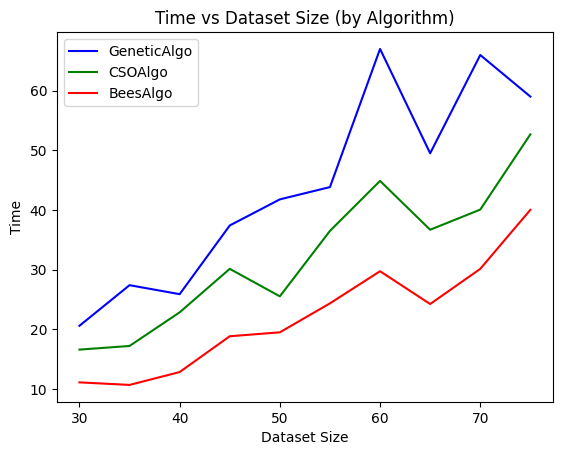

In [34]:
data = copy(rrdata)
algorithms = set(d['algo'] for d in data)
colors = ['b', 'g', 'r']

algo_data = {}
for algo in algorithms:
    algo_data[algo] = defaultdict(list)
    for d in data:
        dataset_name = d['dataset']
        size = int(dataset_name.split("_")[-1].split(".")[0])
        if d['algo'] == algo:
            algo_data[algo][size].append(d['time'])

fig, ax = plt.subplots()

for algo, data in algo_data.items():
    fdata = []
    for size, time_list in data.items():
        fdata.append((size, mean(time_list)))
    x, y = zip(*fdata)
    ax.plot(x, y, label=algo, color=colors.pop(0))

ax.set_xlabel('Dataset Size')
ax.set_ylabel('Time')
ax.set_title('Time vs Dataset Size (by Algorithm)')
ax.legend()
plt.show()

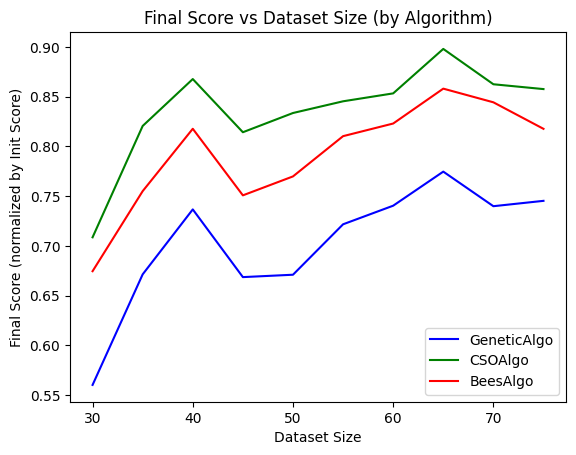

In [36]:
data = copy(rdata)
algorithms = set(d['algo'] for d in data)
colors = ['b', 'g', 'r']

algo_data = {}
for algo in algorithms:
    algo_data[algo] = defaultdict(list)
    for d in data:
        dataset_name = d['dataset']
        size = int(dataset_name.split("_")[-1].split(".")[0])
        if d['algo'] == algo:
            algo_data[algo][size].append(d['final_score']/d['init_score'])

fig, ax = plt.subplots()

for algo, data in algo_data.items():
    fdata = []
    for size, scores in data.items():
        fdata.append((size, mean(scores)))
    x, y = zip(*fdata)
    ax.plot(x, y, label=algo, color=colors.pop(0))

ax.set_xlabel('Dataset Size')
ax.set_ylabel('Final Score (normalized by Init Score)')
ax.set_title('Final Score vs Dataset Size (by Algorithm)')
ax.legend()
plt.show()